<a href="https://colab.research.google.com/github/nightitachi/Block-Notes/blob/main/Titanic11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder , StandardScaler

from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [7]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#Explore Data

In [10]:
train.head()
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [55]:
train.shape

(891, 8)

In [12]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S


In [20]:

train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

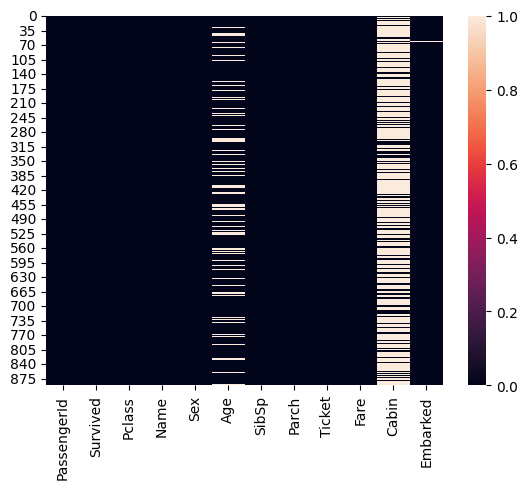

In [19]:
sns.heatmap(train.isnull())

In [38]:
train.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64


#Cleaning Data

In [66]:
train.drop(['Cabin', 'Ticket','Fare', 'Name', 'Embarked'], axis=1, inplace=True, errors='ignore')
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [57]:
train.Age = train.Age.fillna(train.Age.median())
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,28.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


# Transform Data

In [61]:
la = LabelEncoder()
obj = train.select_dtypes(include='object')
non_obj = train.select_dtypes(exclude='object')


In [62]:
for i in range(0, obj.shape[1]):
    obj.iloc[:, i] = la.fit_transform(obj.iloc[:, i])

In [63]:
obj

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [84]:
obj = obj.astype('int')
data = pd.concat([obj,non_obj] , axis = 1)
data

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,1,0,3,22.0,1,0,7.2500
1,0,2,1,1,38.0,1,0,71.2833
2,0,3,1,3,26.0,0,0,7.9250
3,0,4,1,1,35.0,1,0,53.1000
4,1,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,887,0,2,27.0,0,0,13.0000
887,0,888,1,1,19.0,0,0,30.0000
888,0,889,0,3,28.0,1,2,23.4500
889,1,890,1,1,26.0,0,0,30.0000


<Axes: >

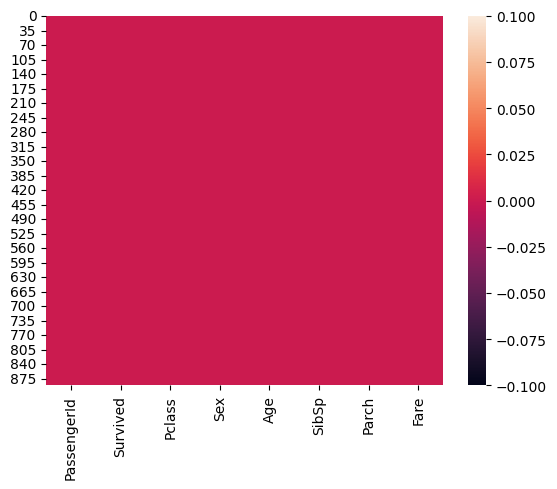

In [65]:
sns.heatmap(train.isnull())

In [80]:
train[obj.columns] = obj.apply(lambda col: la.fit_transform(col))


In [81]:
sc = StandardScaler()

In [88]:
scal1=data[['Age']]
scal2=data[['Fare']]
data[['Age']] = sc.fit_transform(scal1)
data[['Fare']] = sc.fit_transform(scal2)


In [89]:
data

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,1,0,3,-0.565736,1,0,-0.502445
1,0,2,1,1,0.663861,1,0,0.786845
2,0,3,1,3,-0.258337,0,0,-0.488854
3,0,4,1,1,0.433312,1,0,0.420730
4,1,5,0,3,0.433312,0,0,-0.486337
...,...,...,...,...,...,...,...,...
886,1,887,0,2,-0.181487,0,0,-0.386671
887,0,888,1,1,-0.796286,0,0,-0.044381
888,0,889,0,3,-0.104637,1,2,-0.176263
889,1,890,1,1,-0.258337,0,0,-0.044381


# Analysing the Data

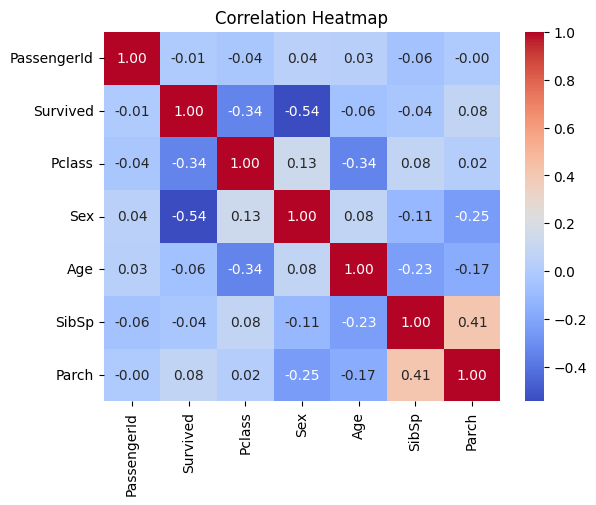

In [98]:
co = train.corr()

sns.heatmap(co, annot=True, cmap='coolwarm', fmt=".2f" )
plt.title('Correlation Heatmap')
plt.show()

<Axes: ylabel='count'>

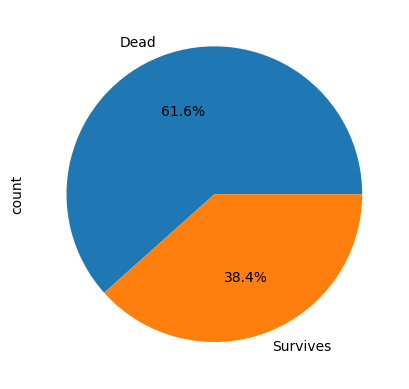

In [103]:
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%' , labels=['Dead' , 'Survives'])